In [2]:
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# Set up paths
data_folder = r'Data\taxi_log_2008_by_id'
full_path = os.path.join(os.getcwd(), data_folder)

In [4]:
# Read all taxi files
all_files = [os.path.join(full_path, f) for f in os.listdir(full_path) if f.endswith('.txt')]
df_list = []
for file in all_files:
    temp = pd.read_csv(file, header=None, names=['taxiId', 'timestamp', 'longitude', 'latitude'])
    df_list.append(temp)
df = pd.concat(df_list, ignore_index=True)

C:\Users\atomi\AppData\Local\Temp\ipykernel_33148\2476984194.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [5]:
# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [6]:
#display random 20 rows of the dataframe df
print(df.sample(20))

         taxiId           timestamp  longitude  latitude
7988030    5001 2008-02-03 16:45:38  116.42253  39.86442
13368850   7843 2008-02-04 20:48:00  116.44418  39.93980
8616277    5310 2008-02-04 08:52:44  116.42697  39.94898
8255532    5081 2008-02-06 13:51:28  117.10763  40.10723
4170308    3015 2008-02-04 20:34:59  114.97365  38.52832
6414404    4115 2008-02-07 06:14:22  116.38153  39.85318
3057643    2450 2008-02-07 19:24:32  116.42535  39.93300
17124906   9730 2008-02-04 17:14:22  116.34649  39.90538
17414251   9904 2008-02-07 22:30:35  116.34615  40.03200
17546200   9949 2008-02-04 06:53:23  116.47580  39.92698
3274774    2560 2008-02-06 05:16:19  116.23366  39.86231
12697126   7416 2008-02-03 03:29:49  116.41295  39.89178
4062371    2982 2008-02-04 15:47:17  116.25413  39.95482
16833831   9548 2008-02-06 06:30:16  116.82711  40.09728
14744000   8554 2008-02-07 04:19:19  116.35371  39.86707
15543844   8861 2008-02-04 00:54:53  116.31780  39.95053
10527222   6307 2008-02-03 10:4

In [7]:
#sort and merge by timestamp (as priority) then by taxiId if the timestamps are the same
df = df.sort_values(by=['timestamp', 'taxiId']).reset_index(drop=True)
print(df.head(20))

   taxiId           timestamp  longitude  latitude
0    3015 2008-02-02 13:30:44  116.41036  39.89171
1    3579 2008-02-02 13:30:44  116.40048  39.90350
2    6275 2008-02-02 13:30:44  116.36838  39.90484
3    3015 2008-02-02 13:30:45  116.41028  39.89170
4    3579 2008-02-02 13:30:45  116.40049  39.90341
5    6275 2008-02-02 13:30:45  116.36838  39.90484
6    7659 2008-02-02 13:30:45  116.35203  39.84086
7    7659 2008-02-02 13:30:45  116.35203  39.84086
8    7659 2008-02-02 13:30:45  116.35203  39.84086
9    7659 2008-02-02 13:30:45  116.35203  39.84086
10   7659 2008-02-02 13:30:45  116.35203  39.84086
11   7659 2008-02-02 13:30:45  116.35203  39.84086
12   7659 2008-02-02 13:30:45  116.35203  39.84086
13   7659 2008-02-02 13:30:45  116.35203  39.84086
14   7659 2008-02-02 13:30:45  116.35203  39.84086
15   7659 2008-02-02 13:30:45  116.35203  39.84086
16   7659 2008-02-02 13:30:45  116.35203  39.84086
17   7659 2008-02-02 13:30:45  116.35203  39.84086
18   7659 2008-02-02 13:30:45  

In [8]:
print(df.sample(20))

         taxiId           timestamp  longitude  latitude
9726976    1854 2008-02-05 16:10:40  116.85477  40.33570
2693925    8554 2008-02-03 11:45:00  116.33964  39.85720
17492977   5335 2008-02-08 16:25:54  116.53052  39.73931
1108073    7204 2008-02-02 20:42:24  116.47853  39.93107
453655     1772 2008-02-02 16:34:10  116.45110  39.99553
569107     8946 2008-02-02 17:20:39  116.39598  39.96700
16673929   6487 2008-02-08 10:42:38  116.88010  40.30311
16533884   5610 2008-02-08 09:17:54  117.10773  40.13674
1942187    9058 2008-02-03 03:42:44  116.49414  39.97035
3698154   10326 2008-02-03 18:02:55  116.27730  39.90219
5256333    4177 2008-02-04 05:51:22  116.24093  39.91465
3803584    5796 2008-02-03 18:40:23  116.42502  39.98645
10826125     39 2008-02-05 23:26:57  116.82280  40.15694
12308550   7695 2008-02-06 14:36:25  116.40548  39.89134
5957897    4452 2008-02-04 11:46:05  116.31570  39.89195
14521481   9957 2008-02-07 13:00:55  116.43430  39.88174
6744329   10094 2008-02-04 16:3

In [9]:
#check latitude for outliers
print(df['latitude'].describe())

count    1.766298e+07
mean     3.984973e+01
std      1.904082e+00
min      0.000000e+00
25%      3.987953e+01
50%      3.992271e+01
75%      3.998121e+01
max      9.606767e+01
Name: latitude, dtype: float64


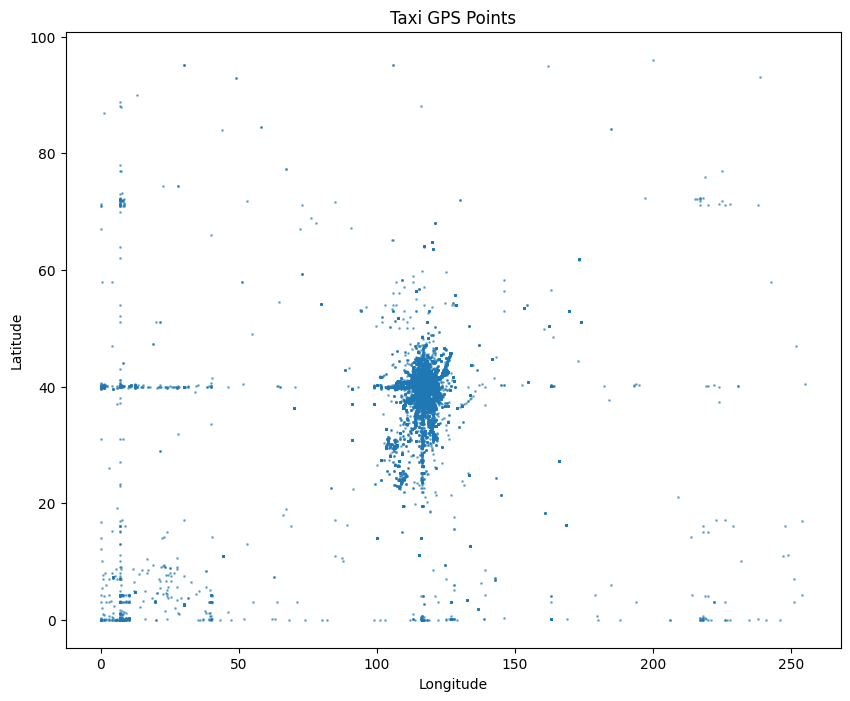

In [10]:
# Plot the latitude and longitude of the taxis
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.5)
plt.title('Taxi GPS Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
len(df)

17662984

In [12]:
#for the first 20 taxi ids, calculate distance traveled and store in a dictionary paired with taxiId
taxi_distances_20 = {}
for taxi_id in df['taxiId'].unique()[:20]:
    taxi_data = df[df['taxiId'] == taxi_id].sort_values(by='timestamp')
    total_distance = 0.0
    
    for i in range(1, len(taxi_data)):
        start_point = (taxi_data.iloc[i-1]['latitude'], taxi_data.iloc[i-1]['longitude'])
        end_point = (taxi_data.iloc[i]['latitude'], taxi_data.iloc[i]['longitude'])
        total_distance += geodesic(start_point, end_point).meters
    
    taxi_distances_20[taxi_id] = total_distance

In [13]:
#count entries for each taxiId, store in a dictionary. print the maximum and minimum entries
taxi_counts = df['taxiId'].value_counts().to_dict()
max_taxi = max(taxi_counts, key=taxi_counts.get)
min_taxi = min(taxi_counts, key=taxi_counts.get)
print(f"Taxi with most entries: {max_taxi} ({taxi_counts[max_taxi]} entries)")
print(f"Taxi with least entries: {min_taxi} ({taxi_counts[min_taxi]} entries)")

#what is the avaerage entry count for all taxis
average_count = sum(taxi_counts.values()) / len(taxi_counts)
print(f"Average entry count for all taxis: {average_count:.2f}")

#standard deviation of the entry counts
std_dev_count = pd.Series(taxi_counts).std()
print(f"Standard deviation of entry counts: {std_dev_count:.2f}")

Taxi with most entries: 6275 (154688 entries)
Taxi with least entries: 10260 (1 entries)
Average entry count for all taxis: 1708.88
Standard deviation of entry counts: 4733.81


We make a decision to startv with 100 taxis

In [14]:
#sample 100 taxis with more than 1708 entries
sampled_taxis = [taxi_id for taxi_id, count in taxi_counts.items() if count > 1708]
#create a new dataframe with only the sampled taxis
sampled_df = df[df['taxiId'].isin(sampled_taxis)]

In [15]:
sampled_df

,taxiId,timestamp,longitude,latitude
0,3015,2008-02-02 13:30:44,116.41036,39.89171
1,3579,2008-02-02 13:30:44,116.40048,39.90350
2,6275,2008-02-02 13:30:44,116.36838,39.90484
3,3015,2008-02-02 13:30:45,116.41028,39.89170
4,3579,2008-02-02 13:30:45,116.40049,39.90341
...,...,...,...,...
17662975,7657,2008-02-08 17:39:19,116.32875,39.95635
17662976,7685,2008-02-08 17:39:19,116.31397,39.96857
17662980,8696,2008-02-08 17:39:19,116.53285,40.07398
17662982,9885,2008-02-08 17:39:19,116.35930,39.86393


In [16]:
# Select 100 unique taxi IDs from the original DataFrame
selected_ids = df['taxiId'].unique()[:100]
sampled_df = df[df['taxiId'].isin(selected_ids)]
print(f"sampled_df now contains {sampled_df['taxiId'].nunique()} unique taxi ids")
print(f"sampled_df length: {len(sampled_df)}")

sampled_df now contains 100 unique taxi ids
sampled_df length: 2241985


In [17]:
taxi_distances = {}
for taxi_id in sampled_df['taxiId'].unique()[:100]:
    taxi_data = sampled_df[sampled_df['taxiId'] == taxi_id].sort_values(by='timestamp')
    total_distance = 0.0
    
    for i in range(1, len(taxi_data)):
        start_point = (taxi_data.iloc[i-1]['latitude'], taxi_data.iloc[i-1]['longitude'])
        end_point = (taxi_data.iloc[i]['latitude'], taxi_data.iloc[i]['longitude'])
        total_distance += geodesic(start_point, end_point).meters
    
    taxi_distances[taxi_id] = total_distance

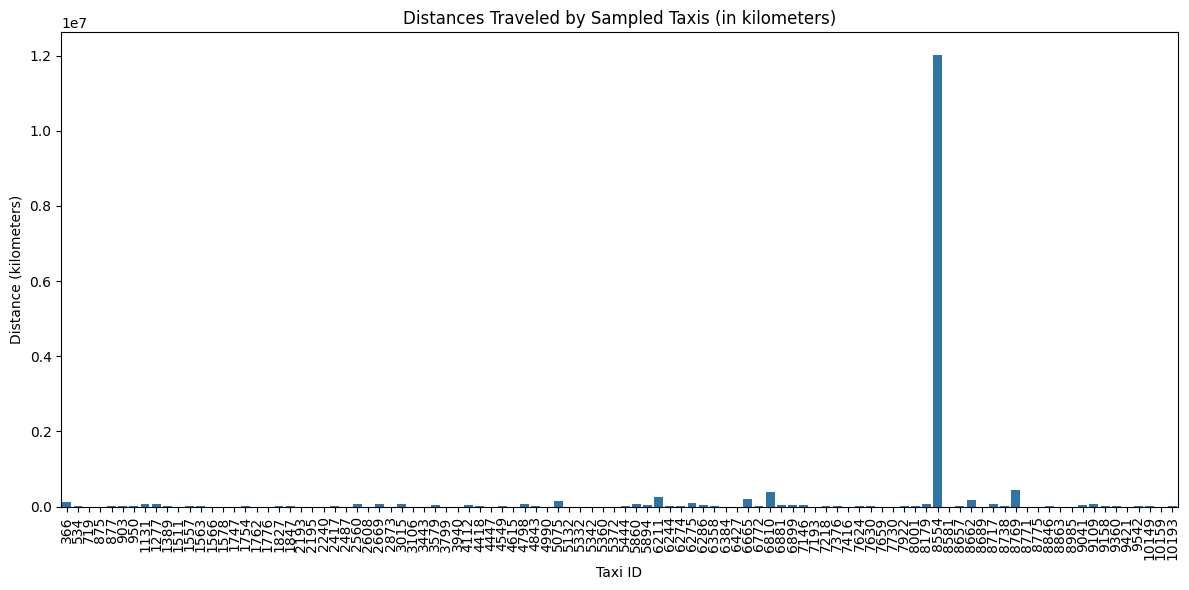

In [18]:
#plot the distances traveled by the sampled taxis in kilometers
plt.figure(figsize=(12, 6))
sns.barplot(x=list(taxi_distances.keys()), y=[d / 1000 for d in taxi_distances.values()])
plt.xticks(rotation=90)
plt.title('Distances Traveled by Sampled Taxis (in kilometers)')
plt.xlabel('Taxi ID')
plt.ylabel('Distance (kilometers)')
plt.tight_layout()
plt.show()

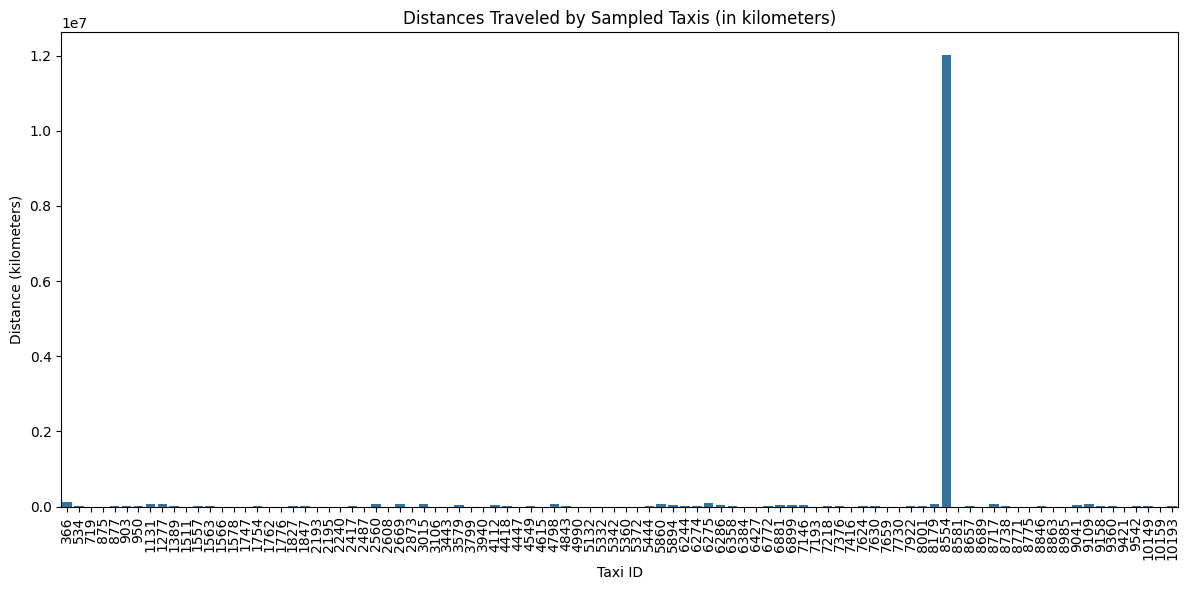

In [19]:
#remove id 8554 from taxi_distances
if 8769 in taxi_distances:
    #del taxi_distances[8554]
    del taxi_distances[8769]
    del taxi_distances[6810]
    del taxi_distances[6211]
    del taxi_distances[6665]
    del taxi_distances[8662]
    del taxi_distances[5075]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(taxi_distances.keys()), y=[d / 1000 for d in taxi_distances.values()])
plt.xticks(rotation=90)
plt.title('Distances Traveled by Sampled Taxis (in kilometers)')
plt.xlabel('Taxi ID')
plt.ylabel('Distance (kilometers)')
plt.tight_layout()
plt.show()

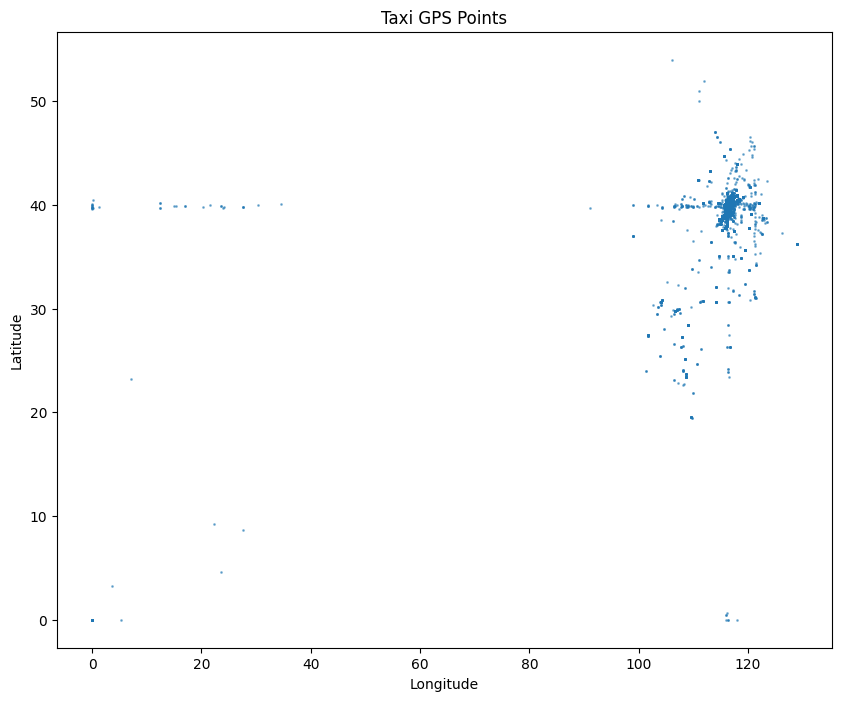

c:\Users\atomi\Documents\Big Data\tax_project_group_A6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


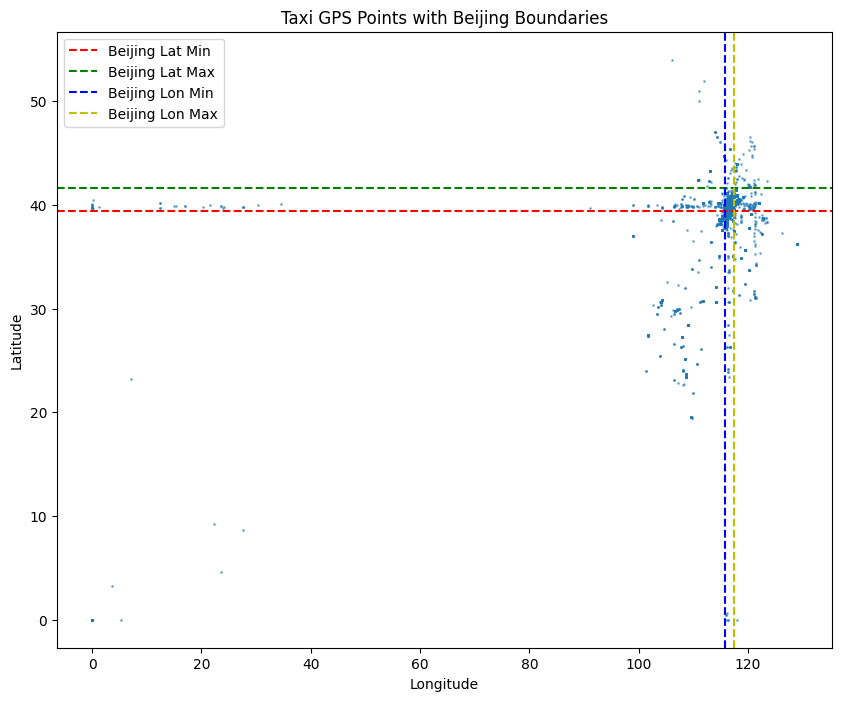

In [20]:
# Plot the latitude and longitude of the taxis
plt.figure(figsize=(10, 8))
plt.scatter(sampled_df['longitude'], sampled_df['latitude'], s=1, alpha=0.5)
plt.title('Taxi GPS Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#draw a line at these points on the plot beijing_lat_min, beijing_lat_max = 39.6, 40.2 beijing_lon_min, beijing_lon_max = 116.1, 116.7
beijing_lat_min, beijing_lat_max = 39.4, 41.6
beijing_lon_min, beijing_lon_max = 115.7, 117.4
plt.figure(figsize=(10, 8))
plt.scatter(sampled_df['longitude'], sampled_df['latitude'], s=1, alpha=0.5)
plt.axhline(y=beijing_lat_min, color='r', linestyle='--', label='Beijing Lat Min')
plt.axhline(y=beijing_lat_max, color='g', linestyle='--', label='Beijing Lat Max')
plt.axvline(x=beijing_lon_min, color='b', linestyle='--', label='Beijing Lon Min')
plt.axvline(x=beijing_lon_max, color='y', linestyle='--', label='Beijing Lon Max')
plt.title('Taxi GPS Points with Beijing Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

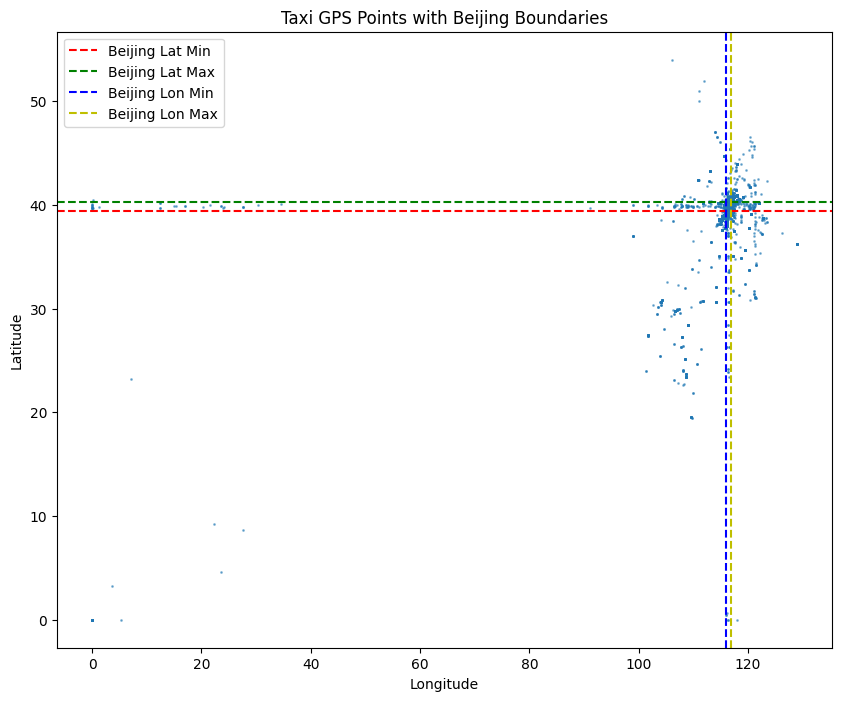

In [21]:
#draw a line at these points on the plot beijing_lat_min, beijing_lat_max = 39.6, 40.2 beijing_lon_min, beijing_lon_max = 116.1, 116.7
beijing_lat_min, beijing_lat_max = 39.4, 40.3
beijing_lon_min, beijing_lon_max = 116, 116.8
plt.figure(figsize=(10, 8))
plt.scatter(sampled_df['longitude'], sampled_df['latitude'], s=1, alpha=0.5)
plt.axhline(y=beijing_lat_min, color='r', linestyle='--', label='Beijing Lat Min')
plt.axhline(y=beijing_lat_max, color='g', linestyle='--', label='Beijing Lat Max')
plt.axvline(x=beijing_lon_min, color='b', linestyle='--', label='Beijing Lon Min')
plt.axvline(x=beijing_lon_max, color='y', linestyle='--', label='Beijing Lon Max')
plt.title('Taxi GPS Points with Beijing Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Check Taxis whose journey started within the region and ended within the region

In [22]:
len(sampled_df)

2241985

In [23]:
sampled_df.head(10)

,taxiId,timestamp,longitude,latitude
0,3015,2008-02-02 13:30:44,116.41036,39.89171
1,3579,2008-02-02 13:30:44,116.40048,39.90350
2,6275,2008-02-02 13:30:44,116.36838,39.90484
3,3015,2008-02-02 13:30:45,116.41028,39.89170
4,3579,2008-02-02 13:30:45,116.40049,39.90341
5,6275,2008-02-02 13:30:45,116.36838,39.90484
6,7659,2008-02-02 13:30:45,116.35203,39.84086
7,7659,2008-02-02 13:30:45,116.35203,39.84086
8,7659,2008-02-02 13:30:45,116.35203,39.84086
9,7659,2008-02-02 13:30:45,116.35203,39.84086


In [24]:
# Define your region boundaries (example: full Beijing Municipality)
beijing_lat_min, beijing_lat_max = 39.4, 40.3
beijing_lon_min, beijing_lon_max = 116.0, 116.8

# Find taxi_ids whose first AND last point are within the region
in_region_taxi_ids = []
for taxi_id in sampled_df['taxiId'].unique():
    taxi_data = sampled_df[sampled_df['taxiId'] == taxi_id].sort_values(by='timestamp')
    first_lat = taxi_data.iloc[0]['latitude']
    first_lon = taxi_data.iloc[0]['longitude']
    last_lat = taxi_data.iloc[-1]['latitude']
    last_lon = taxi_data.iloc[-1]['longitude']
    if (
        (beijing_lat_min <= first_lat <= beijing_lat_max) and
        (beijing_lon_min <= first_lon <= beijing_lon_max) and
        (beijing_lat_min <= last_lat <= beijing_lat_max) and
        (beijing_lon_min <= last_lon <= beijing_lon_max)
    ):
        in_region_taxi_ids.append(taxi_id)

print(f"Number of taxis starting and ending in region: {len(in_region_taxi_ids)}")
# in_region_taxi_ids now contains the taxi IDs whose first and last point are within the region

Number of taxis starting and ending in region: 80


In [25]:
#sort in_region_taxi_ids, print first 20 ids
in_region_taxi_ids.sort()
print("First 20 taxi IDs starting and ending in region:")
print(in_region_taxi_ids[:20])


First 20 taxi IDs starting and ending in region:
[366, 534, 719, 875, 877, 903, 950, 1131, 1277, 1389, 1511, 1557, 1563, 1566, 1578, 1747, 1754, 1762, 1776, 1827]


Our dataset consists of 80 qualified Taxi Ids

Number of entries in in_region_df: 1696254


c:\Users\atomi\Documents\Big Data\tax_project_group_A6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


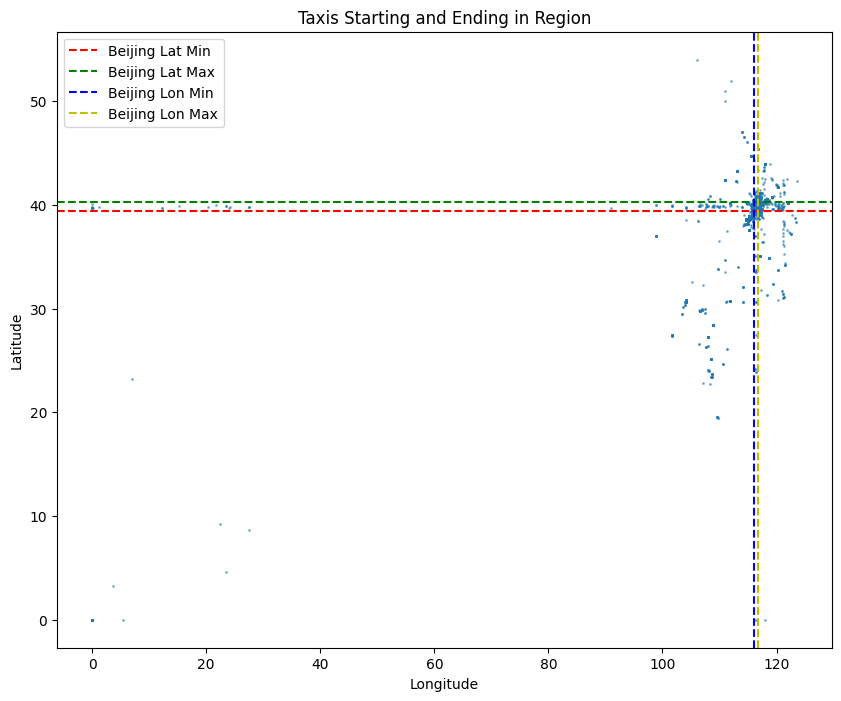

In [26]:
#create a new dataframe with only the taxis that start and end in the region
in_region_df = sampled_df[sampled_df['taxiId'].isin(in_region_taxi_ids)]
print(f"Number of entries in in_region_df: {len(in_region_df)}")
# Plot the latitude and longitude of the taxis that start and end in the region
plt.figure(figsize=(10, 8))
plt.scatter(in_region_df['longitude'], in_region_df['latitude'], s=1, alpha=0.5)
plt.axhline(y=beijing_lat_min, color='r', linestyle='--', label='Beijing Lat Min')
plt.axhline(y=beijing_lat_max, color='g', linestyle='--', label='Beijing Lat Max')
plt.axvline(x=beijing_lon_min, color='b', linestyle='--', label='Beijing Lon Min')
plt.axvline(x=beijing_lon_max, color='y', linestyle='--', label='Beijing Lon Max')
plt.title('Taxis Starting and Ending in Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [27]:
in_region_df.head(10)

,taxiId,timestamp,longitude,latitude
0,3015,2008-02-02 13:30:44,116.41036,39.89171
2,6275,2008-02-02 13:30:44,116.36838,39.90484
3,3015,2008-02-02 13:30:45,116.41028,39.89170
5,6275,2008-02-02 13:30:45,116.36838,39.90484
6,7659,2008-02-02 13:30:45,116.35203,39.84086
7,7659,2008-02-02 13:30:45,116.35203,39.84086
8,7659,2008-02-02 13:30:45,116.35203,39.84086
9,7659,2008-02-02 13:30:45,116.35203,39.84086
10,7659,2008-02-02 13:30:45,116.35203,39.84086
11,7659,2008-02-02 13:30:45,116.35203,39.84086


In [28]:
dupes = in_region_df[in_region_df.duplicated(subset=['taxiId', 'timestamp', 'longitude', 'latitude'], keep=False)]
print(dupes)

         taxiId           timestamp  longitude  latitude
6          7659 2008-02-02 13:30:45  116.35203  39.84086
7          7659 2008-02-02 13:30:45  116.35203  39.84086
8          7659 2008-02-02 13:30:45  116.35203  39.84086
9          7659 2008-02-02 13:30:45  116.35203  39.84086
10         7659 2008-02-02 13:30:45  116.35203  39.84086
...         ...                 ...        ...       ...
17661594   8717 2008-02-08 17:38:38  116.39500  39.83946
17661595   8717 2008-02-08 17:38:38  116.39500  39.83946
17661596   8717 2008-02-08 17:38:38  116.39500  39.83946
17661615   6211 2008-02-08 17:38:39  116.35026  39.91091
17661616   6211 2008-02-08 17:38:39  116.35026  39.91091

[141948 rows x 4 columns]


In [29]:
# Remove duplicates based on these columns only, ignoring all others
in_region_df = in_region_df.drop_duplicates(subset=['taxiId', 'timestamp', 'longitude', 'latitude'], keep='first').reset_index(drop=True)

In [30]:
dupes = in_region_df[in_region_df.duplicated(subset=['taxiId', 'timestamp', 'longitude', 'latitude'], keep=False)]
print(dupes)

Empty DataFrame
Columns: [taxiId, timestamp, longitude, latitude]
Index: []


In [31]:
#check if the following ids are in in_region_df  4867, 5414 , 4401 , 1971 , 4854 , 5854 , 1948 , 534 , 5460 , 5316 
ids_to_check = [4867, 5414, 4401, 1971, 4854, 5854, 1948, 534, 5460, 5316]
for taxi_id in ids_to_check:
    if taxi_id in in_region_df['taxiId'].values:
        print(f"Taxi ID {taxi_id} is in the DataFrame.")
    else:
        print(f"Taxi ID {taxi_id} is NOT in the DataFrame.")

Taxi ID 4867 is NOT in the DataFrame.
Taxi ID 5414 is NOT in the DataFrame.
Taxi ID 4401 is NOT in the DataFrame.
Taxi ID 1971 is NOT in the DataFrame.
Taxi ID 4854 is NOT in the DataFrame.
Taxi ID 5854 is NOT in the DataFrame.
Taxi ID 1948 is NOT in the DataFrame.
Taxi ID 534 is in the DataFrame.
Taxi ID 5460 is NOT in the DataFrame.
Taxi ID 5316 is NOT in the DataFrame.


In [64]:
# for each of these ids, 6257, 6211 , 8554, 7630, 6665, 534 , 8662 , 4867, 5414, 4401, 1971, 4854, 5854, 1948, 5460, 5316 average the latitude and longitude for same timestamp

ids_to_check = [6211, 8554, 7630, 6665, 534, 8662, 8717 ]

#print count of these ids
for taxi_id in ids_to_check:
    count = in_region_df[in_region_df['taxiId'] == taxi_id].shape[0]
    print(f"Taxi ID {taxi_id} has {count} entries in the DataFrame.")


# check for each if these ids if they have more than 1 entry for the same timestamp, if yes, merge them by averaging latitude and longitude
for taxi_id in ids_to_check:
    taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id]
    if taxi_data.duplicated(subset=['timestamp']).any():
        print(f"Taxi ID {taxi_id} has duplicate timestamps.")
        # Average latitude and longitude for duplicate timestamps
        averaged_data = taxi_data.groupby('timestamp').agg({
            'latitude': 'mean',
            'longitude': 'mean'
        }).reset_index()
        averaged_data['taxiId'] = taxi_id  # Add the taxiId back
        # Replace the original data with the averaged data
        in_region_df = in_region_df[in_region_df['taxiId'] != taxi_id]  # Remove old entries
        in_region_df = pd.concat([in_region_df, averaged_data], ignore_index=True)  # Add averaged data
    else:
        print(f"Taxi ID {taxi_id} has no duplicate timestamps.")

Taxi ID 6211 has 43249 entries in the DataFrame.
Taxi ID 8554 has 43202 entries in the DataFrame.
Taxi ID 7630 has 30428 entries in the DataFrame.
Taxi ID 6665 has 82443 entries in the DataFrame.
Taxi ID 534 has 32782 entries in the DataFrame.
Taxi ID 8662 has 81050 entries in the DataFrame.
Taxi ID 8717 has 92448 entries in the DataFrame.
Taxi ID 6211 has duplicate timestamps.
Taxi ID 8554 has duplicate timestamps.
Taxi ID 7630 has duplicate timestamps.
Taxi ID 6665 has duplicate timestamps.
Taxi ID 534 has duplicate timestamps.
Taxi ID 8662 has duplicate timestamps.
Taxi ID 8717 has duplicate timestamps.


In [65]:
# check if duplicates were removed for these ids
for taxi_id in ids_to_check:
    count = in_region_df[in_region_df['taxiId'] == taxi_id].shape[0]
    print(f"Taxi ID {taxi_id} now has {count} entries in the DataFrame after averaging duplicates.")

Taxi ID 6211 now has 43245 entries in the DataFrame after averaging duplicates.
Taxi ID 8554 now has 43195 entries in the DataFrame after averaging duplicates.
Taxi ID 7630 now has 30427 entries in the DataFrame after averaging duplicates.
Taxi ID 6665 now has 82436 entries in the DataFrame after averaging duplicates.
Taxi ID 534 now has 32779 entries in the DataFrame after averaging duplicates.
Taxi ID 8662 now has 81044 entries in the DataFrame after averaging duplicates.
Taxi ID 8717 now has 92442 entries in the DataFrame after averaging duplicates.


===================                                                      ===============     
=================== GO TO FINAL_DATA_CLEANING.IPYNB TO COMPLETE CLEANING ===============
===================                                                      ===============     

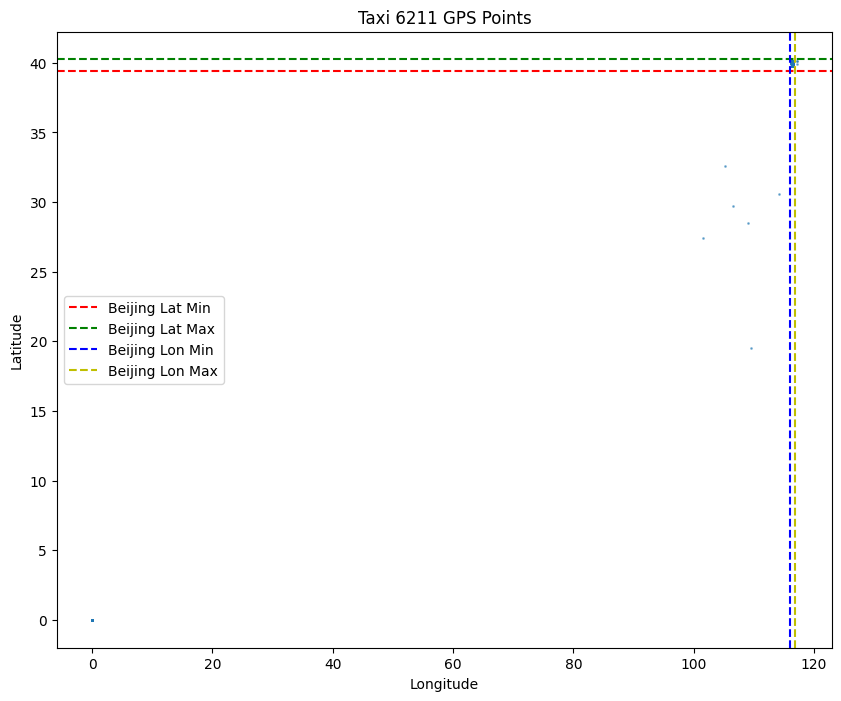

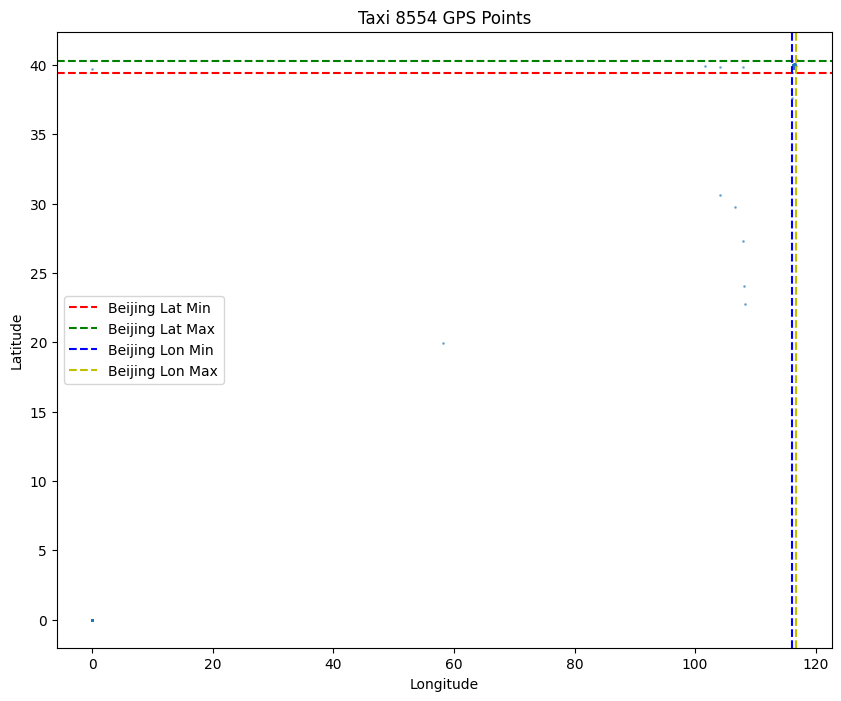

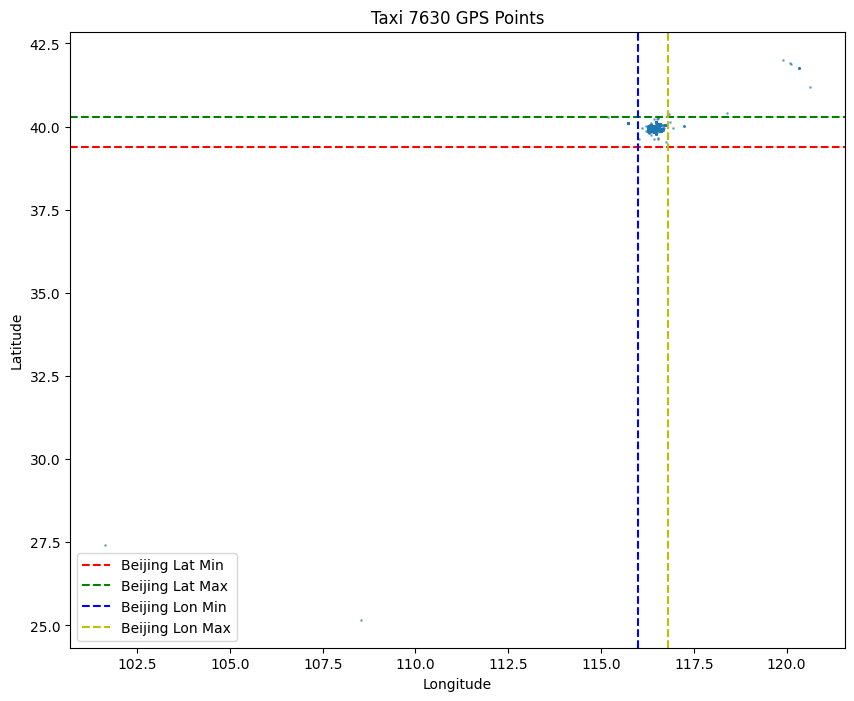

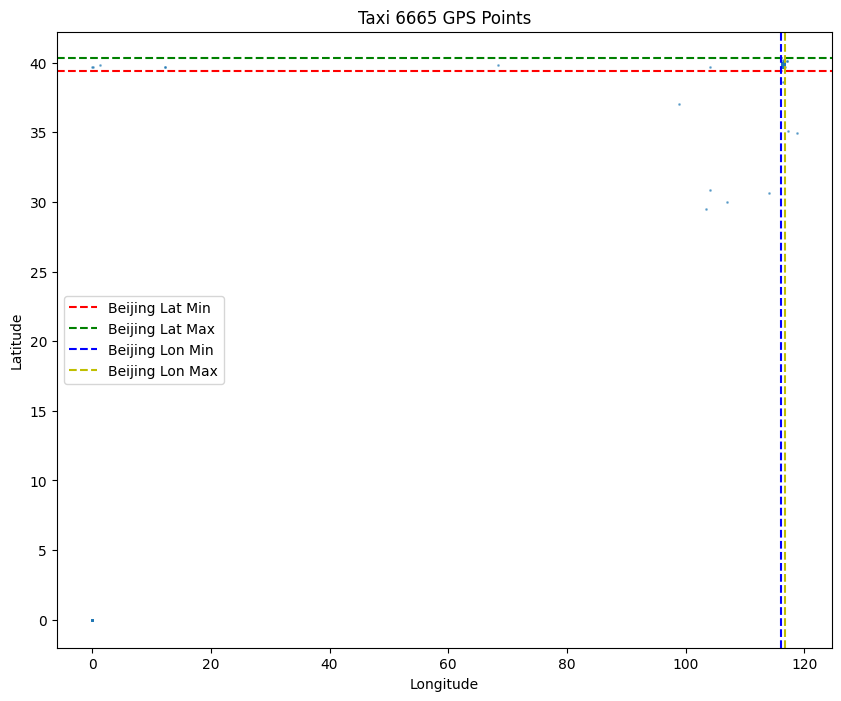

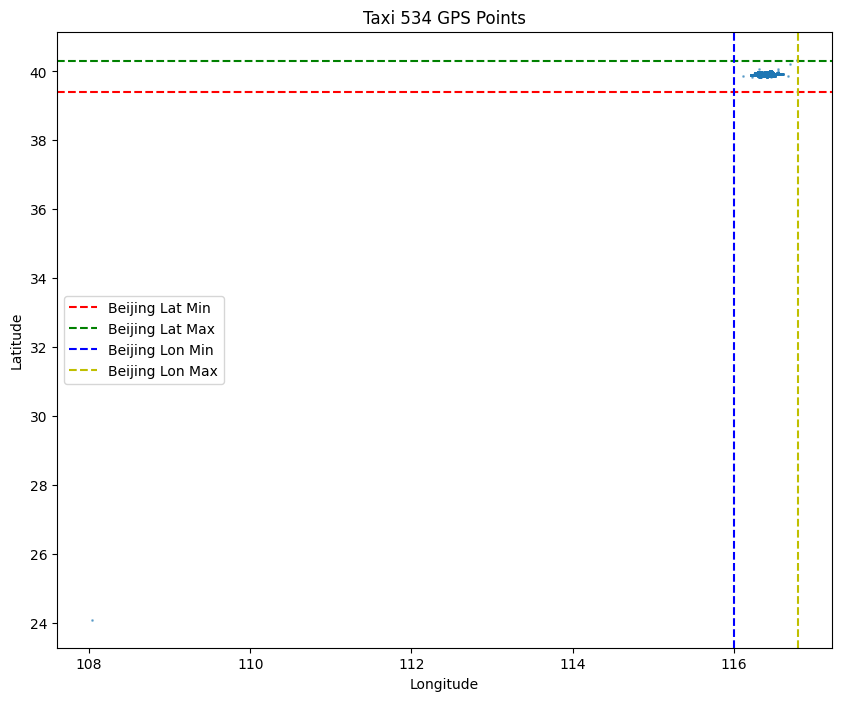

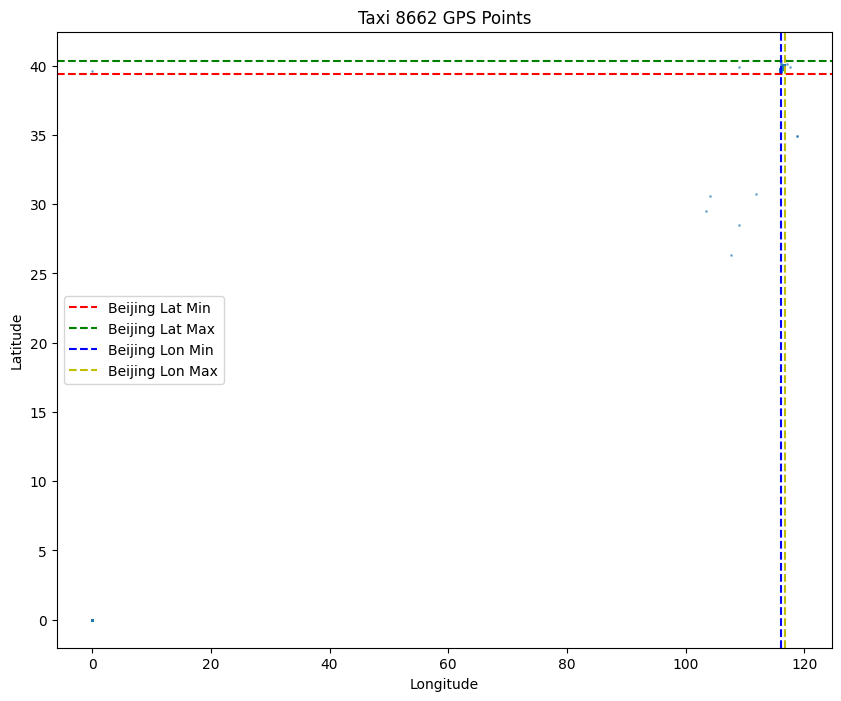

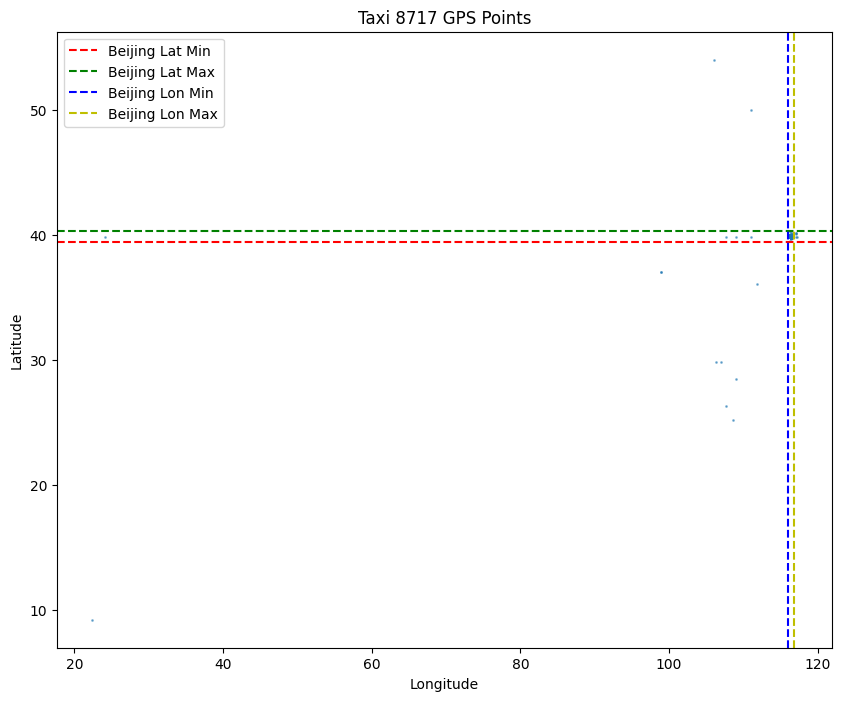

In [ ]:
#for each id in ids_to_check, plot the latitude and longitude of the taxis
for taxi_id in ids_to_check:
    taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id]
    plt.figure(figsize=(10, 8))
    plt.scatter(taxi_data['longitude'], taxi_data['latitude'], s=1, alpha=0.5)
    plt.axhline(y=beijing_lat_min, color='r', linestyle='--', label='Beijing Lat Min')
    plt.axhline(y=beijing_lat_max, color='g', linestyle='--', label='Beijing Lat Max')
    plt.axvline(x=beijing_lon_min, color='b', linestyle='--', label='Beijing Lon Min')
    plt.axvline(x=beijing_lon_max, color='y', linestyle='--', label='Beijing Lon Max')
    plt.title(f'Taxi {taxi_id} GPS Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

In [84]:
#for taxi id 534, print the rows where longitude is less than 110.0 or latitude is less than 37 and the rows before and after these rows
taxi_id = 7630
taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id].sort_values(by='timestamp')
outliers = taxi_data[(taxi_data['longitude'] > 118.0) | (taxi_data['latitude'] < 38)]

print("Outliers for Taxi ID 534:")
print(outliers)

#534,8717,7630
#6211, 8554, 7630, 6665, 534, 8662, 8717

Outliers for Taxi ID 534:
        taxiId           timestamp  longitude  latitude
1310986   7630 2008-02-04 09:57:04  120.62402  41.20043
1310987   7630 2008-02-04 10:00:26  119.90690  42.01070
1310988   7630 2008-02-04 10:01:33  120.09978  41.91135
1310989   7630 2008-02-04 10:01:42  120.12615  41.89698
1310990   7630 2008-02-04 10:02:52  120.34135  41.76897
1310991   7630 2008-02-04 10:08:23  120.34135  41.76897
1310992   7630 2008-02-04 10:08:27  120.34135  41.76897
1310993   7630 2008-02-04 10:08:31  120.34135  41.76897
1310994   7630 2008-02-04 10:08:33  120.34135  41.76897
1318804   7630 2008-02-06 04:17:06  108.53999  25.17148
1319971   7630 2008-02-06 10:06:00  118.39313  40.41007
1323790   7630 2008-02-07 04:10:06  101.63525  27.40675


In [85]:
#save each of the ids in ids_to_check to a separate txt file e.g id.txt
for taxi_id in ids_to_check:
    taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id]
    file_name = f"taxi_{taxi_id}.txt"
    taxi_data.to_csv(file_name, index=False, sep='\t')
    print(f"Saved data for Taxi ID {taxi_id} to {file_name}")

Saved data for Taxi ID 6211 to taxi_6211.txt
Saved data for Taxi ID 8554 to taxi_8554.txt
Saved data for Taxi ID 7630 to taxi_7630.txt
Saved data for Taxi ID 6665 to taxi_6665.txt
Saved data for Taxi ID 534 to taxi_534.txt
Saved data for Taxi ID 8662 to taxi_8662.txt
Saved data for Taxi ID 8717 to taxi_8717.txt


In [32]:
#check the number of points for each taxiId in in_region_df
taxi_counts_in_region = in_region_df['taxiId'].value_counts().to_dict()
# Print the maximum and minimum entries for taxis in the region
max_taxi_in_region = max(taxi_counts_in_region, key=taxi_counts_in_region.get)
min_taxi_in_region = min(taxi_counts_in_region, key=taxi_counts_in_region.get)
print(f"Taxi with most entries in region: {max_taxi_in_region} ({taxi_counts_in_region[max_taxi_in_region]} entries)")
print(f"Taxi with least entries in region: {min_taxi_in_region} ({taxi_counts_in_region[min_taxi_in_region]} entries)")

#print all taxi ids in in_region_df and their counts
for taxi_id, count in taxi_counts_in_region.items():
    print(f"Taxi ID {taxi_id} has {count} entries in the region.")

Taxi with most entries in region: 6275 (148181 entries)
Taxi with least entries in region: 7659 (202 entries)
Taxi ID 6275 has 148181 entries in the region.
Taxi ID 3015 has 139954 entries in the region.
Taxi ID 366 has 95485 entries in the region.
Taxi ID 8179 has 94758 entries in the region.
Taxi ID 8717 has 92448 entries in the region.
Taxi ID 1131 has 91208 entries in the region.
Taxi ID 5860 has 90046 entries in the region.
Taxi ID 4798 has 88444 entries in the region.
Taxi ID 1277 has 84550 entries in the region.
Taxi ID 6665 has 82443 entries in the region.
Taxi ID 8662 has 81050 entries in the region.
Taxi ID 9109 has 74427 entries in the region.
Taxi ID 6211 has 43249 entries in the region.
Taxi ID 8554 has 43202 entries in the region.
Taxi ID 534 has 32782 entries in the region.
Taxi ID 7630 has 30428 entries in the region.
Taxi ID 950 has 24963 entries in the region.
Taxi ID 1563 has 19458 entries in the region.
Taxi ID 6810 has 11344 entries in the region.
Taxi ID 1827 has 

In [58]:
#for taxi id 6275 count the number of entries in in_region_df
taxi_id_to_check = 534   
taxi_count_534 = in_region_df[in_region_df['taxiId'] == taxi_id_to_check].shape[0]
print(f"Taxi ID {taxi_id_to_check} has {taxi_count_534} entries in the region.")

Taxi ID 534 has 32782 entries in the region.


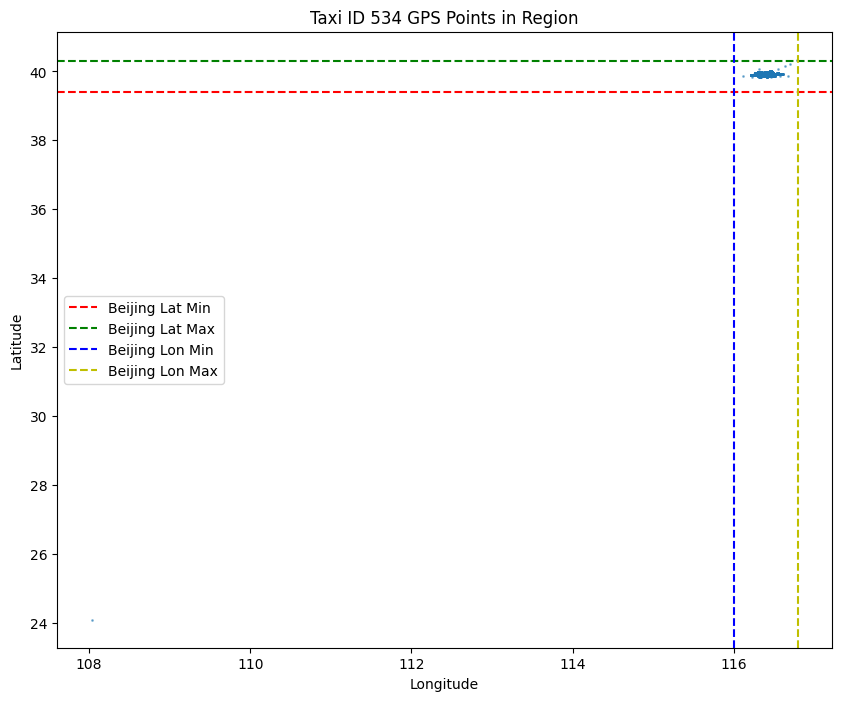

In [59]:
#visalize taxi id 534 in in_region_df
taxi_534_data = in_region_df[in_region_df['taxiId'] == taxi_id_to_check]
plt.figure(figsize=(10, 8))
plt.scatter(taxi_534_data['longitude'], taxi_534_data['latitude'], s=1, alpha=0.5)
plt.axhline(y=beijing_lat_min, color='r', linestyle='--', label='Beijing Lat Min')
plt.axhline(y=beijing_lat_max, color='g', linestyle='--', label='Beijing Lat Max')
plt.axvline(x=beijing_lon_min, color='b', linestyle='--', label='Beijing Lon Min')
plt.axvline(x=beijing_lon_max, color='y', linestyle='--', label='Beijing Lon Max')
plt.title('Taxi ID 534 GPS Points in Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [60]:
#check for duplicate timestamps for taxi id 534
duplicate_timestamps = taxi_534_data[taxi_534_data.duplicated(subset=['timestamp'], keep=False)]

In [61]:
#print rows of duplicate timestamps for taxi id 534
print("Duplicate timestamps for Taxi ID 534:")
print(duplicate_timestamps)

Duplicate timestamps for Taxi ID 534:
       taxiId           timestamp  longitude  latitude
14571     534 2008-02-02 14:18:36  116.45831  39.87759
14572     534 2008-02-02 14:18:36  116.35035  39.89114
381203    534 2008-02-03 22:18:44  116.57257  39.87759
381204    534 2008-02-03 22:18:44  116.45879  39.87759
944067    534 2008-02-06 01:12:49  116.64162  40.16184
944068    534 2008-02-06 01:12:49  116.45844  39.87726


In [47]:
#check for row with longitude less than 110, print the row if it exists
outlier_longitude = taxi_534_data[taxi_534_data['longitude'] < 110]
if not outlier_longitude.empty:
    print("Outlier longitude found for Taxi ID 534:")
    print(outlier_longitude)

Outlier longitude found for Taxi ID 534:
        taxiId           timestamp  longitude  latitude
493397     366 2008-02-04 10:07:47   27.53383  39.80584
621879     366 2008-02-04 19:35:08  108.61225  39.80590
940037     366 2008-02-06 00:44:04   27.58450  39.80600
967613     366 2008-02-06 04:01:41    0.00000  39.80644
968087     366 2008-02-06 04:05:32    0.00000   0.00000
986533     366 2008-02-06 06:39:07   27.58417   8.61700
1393439    366 2008-02-07 20:36:42  107.96631  27.30383
1572459    366 2008-02-08 14:09:42   24.00083  39.66667


In [ ]:
"""

#Data with Outlier

#create a folder in this directory C:\Users\atomi\Documents\bd25_project_a6_b\taxi_locations\data called Data_without_outlier
#save each unique taxiId in a separate txt file i.e id_1234.txt
output_folder = r'Data_with_outliers'
output_path = os.path.join(r"C:\Users\atomi\Documents\bd25_project_a6_b\taxi_locations\data", output_folder)
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Save each unique taxiId in a separate txt file, sorted by timestamp
for taxi_id in in_region_df['taxiId'].unique():
    taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id].sort_values(by='timestamp')
    file_name = f'id_{taxi_id}.txt'
    file_path = os.path.join(output_path, file_name)
    taxi_data.to_csv(file_path, index=False, header=False)

"""

In [ ]:
"""
#Data without Outliers

#remove data points with longitude < 80.0 from in_region_df
in_region_df = in_region_df[in_region_df['longitude'] >= 80.0]


output_folder = r'Data_without_outliers'
output_path = os.path.join(r"C:\Users\atomi\Documents\bd25_project_a6_b\taxi_locations\data", output_folder)
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Save each unique taxiId in a separate txt file, sorted by timestamp
for taxi_id in in_region_df['taxiId'].unique():
    taxi_data = in_region_df[in_region_df['taxiId'] == taxi_id].sort_values(by='timestamp')
    file_name = f'id_{taxi_id}.txt'
    file_path = os.path.join(output_path, file_name)
    taxi_data.to_csv(file_path, index=False, header=False)

"""